## Predicting whether a mammogram mass is benign or malignant

In [1]:
#### Import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Mammography is the most effective method for breast cancer screening
#### available today. However, the low positive predictive value of breast
#### biopsy resulting from mammogram interpretation leads to approximately
#### 70% unnecessary biopsies with benign outcomes. To reduce the high
#### number of unnecessary breast biopsies, several computer-aided diagnosis
#### (CAD) systems have been proposed in the last years.These systems
#### help physicians in their decision to perform a breast biopsy on a suspicious
#### lesion seen in a mammogram or to perform a short term follow-up
#### examination instead.
#### This data set can be used to predict the severity (benign or malignant)
#### of a mammographic mass lesion from BI-RADS attributes and the patient's age.
#### It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes
#### together with the ground truth (the severity field) for 516 benign and
#### 445 malignant masses that have been identified on full field digital mammograms
#### collected at the Institute of Radiology of the
#### University Erlangen-Nuremberg between 2003 and 2006.
#### Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign)
#### to 5 (highly suggestive of malignancy) assigned in a double-review process by
#### physicians. Assuming that all cases with BI-RADS assessments greater or equal
#### a given value (varying from 1 to 5), are malignant and the other cases benign,
#### sensitivities and associated specificities can be calculated. These can be an
#### indication of how well a CAD system performs compared to the radiologists.

#### We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

#### This data contains 961 instances of masses detected in mammograms, and contains the following attributes:

#### BI-RADS assessment: 1 to 5 (ordinal)
####  1. Age: patient's age in years (integer)
####  2. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
####  3. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
####  4. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
####  5. Severity: benign=0 or malignant=1 (binominal)
####  6. BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

####  Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

####  A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

### Data importation

In [2]:
masses_data = pd.read_csv(".../mammographic_masses.data.txt")
masses_data.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [3]:
masses_data.columns.to_list() # We have to renamne the column headers based on attributes

['5', '67', '3', '5.1', '3.1', '1']

#### We have to replace '?' with null values and change the column names as well

### Re-reading the data

#### Make sure you use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names (BI_RADS, age, shape, margin, density, and severity)

In [4]:
masses_data = pd.read_csv("C:/Users/Co/Desktop/python analysis/Machine_Learning_Course/MLCourse/mammographic_masses.data.txt", 
                          names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
masses_data.head()

,BI-RADS,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


In [5]:
masses_data.replace('?', np.nan, inplace = True)

In [6]:
masses_data

,BI-RADS,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,NaN,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,NaN,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


In [7]:
masses_data.isnull().sum()

BI-RADS      2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

In [8]:
masses_data.dtypes

BI-RADS     object
age         object
shape       object
margin      object
density     object
severity     int64
dtype: object

In [9]:
masses_data.columns.to_list()

['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity']

In [10]:
#Convert object types to numeric
masses_data['BI-RADS'] = pd.to_numeric(masses_data['BI-RADS'])
masses_data['age'] = pd.to_numeric(masses_data['age'])
masses_data['shape'] = pd.to_numeric(masses_data['shape'])
masses_data['margin'] = pd.to_numeric(masses_data['margin'])
masses_data['density'] = pd.to_numeric(masses_data['density'])

In [11]:
masses_data.dtypes

BI-RADS     float64
age         float64
shape       float64
margin      float64
density     float64
severity      int64
dtype: object

In [12]:
masses_data

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0,0
957,4.0,56.0,4.0,5.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1


In [13]:
masses_data.isnull().sum()

BI-RADS      2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

In [14]:
masses_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


### Data Pictorization

##### BI-RADS

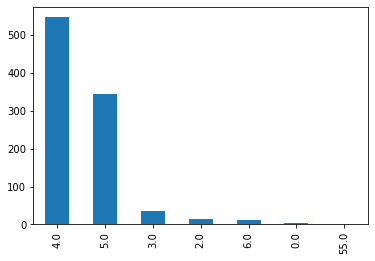

In [15]:
bi_counts = masses_data['BI-RADS'].value_counts()
bi_counts.plot(kind='bar')

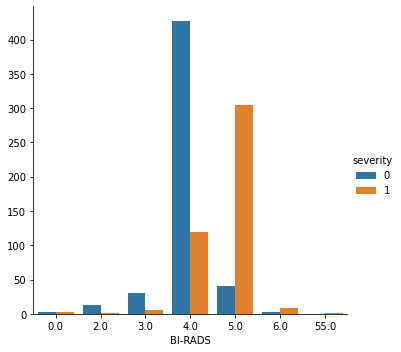

In [16]:
sns.catplot(x='BI-RADS',kind='count', hue='severity', data=masses_data)
plt.ylabel('')
plt.show()

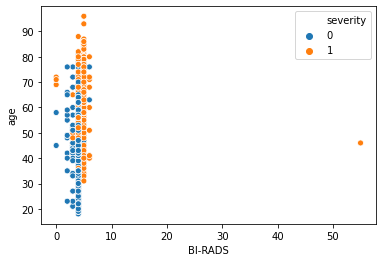

In [17]:
# z = masses_data['BI-RADS']
# # y = masses_data['severity']
# bi_counts = masses_data['BI-RADS'].value_counts()
# plt.scatter(z, bi_counts)

sns.scatterplot(data=masses_data, x='BI-RADS', y='age', hue='severity')

#### For all ages, the BI-RADS assessment occured between 0 and 6 ordinal values except for one value of '55' which can be referred to an outlier

In [18]:
masses_data['BI-RADS'].unique()

array([ 5.,  4.,  3., nan,  2., 55.,  0.,  6.])

In [19]:
masses_data.loc[masses_data['BI-RADS'] == 55]

,BI-RADS,age,shape,margin,density,severity
340,55.0,46.0,4.0,3.0,3.0,1


### Shape

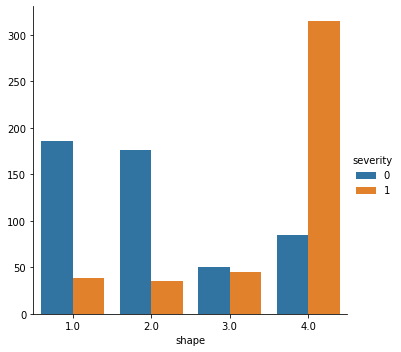

In [20]:
sns.catplot(x='shape',kind='count', hue='severity', data=masses_data)
plt.ylabel('')
plt.show()

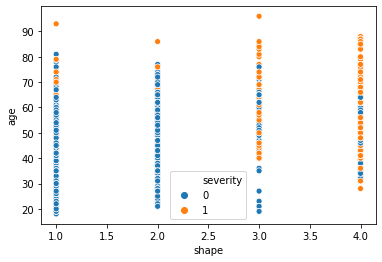

In [21]:
sns.scatterplot(data=masses_data, x='shape', y='age', hue='severity')

#### Mammogram masses with round and oval shapes are much more belign, with low tendencies to being malignant. Lobular shapes has a 50-50 chance to be either benign or malignant. However, Irregular mammogram mass shapes have high tendencies to be malignant  

### Margin

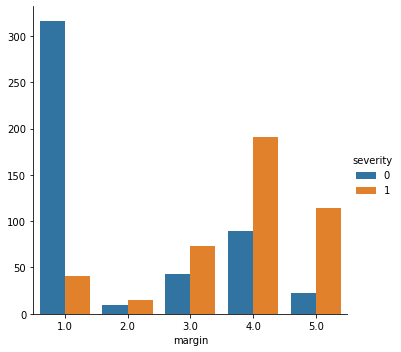

In [22]:
sns.catplot(x='margin',kind='count', hue='severity', data=masses_data)
plt.ylabel('')
plt.show()

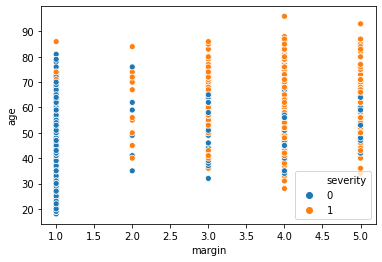

In [23]:
sns.scatterplot(data=masses_data, x='margin', y='age', hue='severity')

#### Circumscribed mammogram mass margin have high tendencies to be belign. Microbulated, Obscured, Ill-defined and Spiculated mammogram mass margin have high tendencies to be malignant with 'ill-defined' margin with the highest

### Density

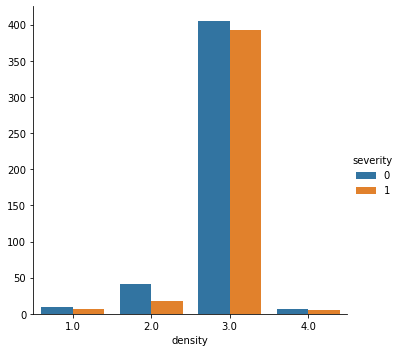

In [24]:
sns.catplot(x='density',kind='count', hue='severity', data=masses_data)
plt.ylabel('')
plt.show()

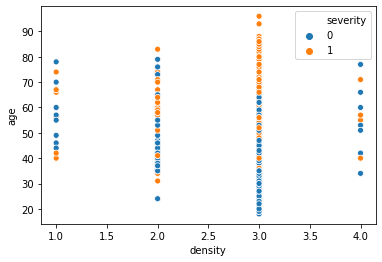

In [25]:
sns.scatterplot(data=masses_data, x='density', y='age', hue='severity')

#### The experiment shows that low mammogram mass density occured the most amongst others (high, iso, fat-containing). However, the densities had less influence on depicting either the mammogram mass had high or low tendencies of being benign or malignant

### Age

In [26]:
df2 = masses_data[['age', 'severity']]
df2.head()

,age,severity
0,67.0,1
1,43.0,1
2,58.0,1
3,28.0,0
4,74.0,1


In [27]:
print(masses_data['age'].max())
print(masses_data['age'].min())

96.0
18.0


In [28]:
df = masses_data[['age', 'severity']]
df
bins = np.arange(10, 100, 10)
age_grade = df.groupby(pd.cut(df['age'], bins)).mean()
print(age_grade)
print(age_grade.iloc[7][1])
print(age_grade['severity'].max())

                age  severity
age                          
(10, 20]  19.000000  0.000000
(20, 30]  25.119048  0.023810
(30, 40]  36.176471  0.196078
(40, 50]  45.552632  0.310526
(50, 60]  55.912000  0.436000
(60, 70]  65.297297  0.608108
(70, 80]  74.698276  0.784483
(80, 90]  84.769231  0.884615
0.8846153846153846
0.8846153846153846


The probablity of having a malignant mammogram mass increase with age


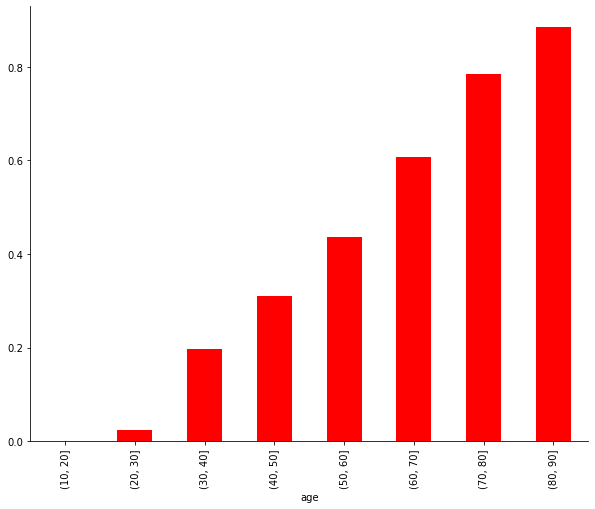

In [29]:
plt.figure(figsize=(10,8))
age_grade['severity'].plot(kind='bar', color='red')
sns.despine()

print('The probablity of having a malignant mammogram mass increase with age' )

In [30]:
#binning tha age data in 10's

df = masses_data[['age', 'severity']]
df
bins = np.arange(10, 100, 10)
age_grade = pd.cut(df['age'], bins).to_frame()

#rename the 'age' column to 'age_grade' coulumn
age_grade.rename(columns={'age':'age_grade'}, inplace=True)
age_grade

age_g_vs_severity = age_grade.join(df)
age_g_vs_severity

,age_grade,age,severity
0,"(60, 70]",67.0,1
1,"(40, 50]",43.0,1
2,"(50, 60]",58.0,1
3,"(20, 30]",28.0,0
4,"(70, 80]",74.0,1
...,...,...,...
956,"(40, 50]",47.0,0
957,"(50, 60]",56.0,1
958,"(60, 70]",64.0,0
959,"(60, 70]",66.0,1


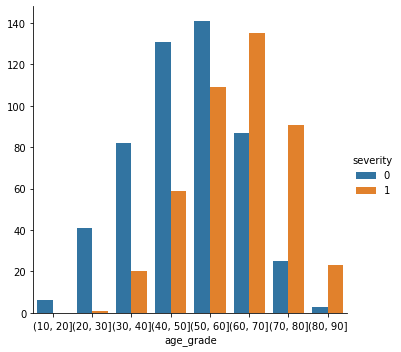

In [31]:
sns.catplot(x='age_grade', kind='count', hue='severity', data=age_g_vs_severity)
plt.ylabel('')
plt.show()

#### The data above shows that ages from 60 years and above have a higher tendency for a malignant mammogramn mass. Ages between 30 to 60 years show possible cases of a malignant mammogram mass but the benign type exist more. 30 years and below show a negligible occurence of a malignant mammogram mass

### Feature Extraction

In [32]:
masses_data.isnull().sum()

BI-RADS      2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

In [33]:
masses_data.head(30)

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
9,5.0,60.0,NaN,5.0,1.0,1


In [34]:
masses_data.loc[masses_data['BI-RADS'] == 3.0].head(20)

,BI-RADS,age,shape,margin,density,severity
11,3.0,42.0,2.0,1.0,3.0,1
16,3.0,52.0,3.0,4.0,3.0,0
63,3.0,57.0,2.0,1.0,NaN,0
82,3.0,68.0,1.0,1.0,3.0,1
107,3.0,34.0,2.0,1.0,NaN,0
154,3.0,34.0,4.0,4.0,3.0,0
201,3.0,49.0,4.0,4.0,3.0,0
219,3.0,45.0,2.0,1.0,3.0,0
220,3.0,43.0,2.0,1.0,3.0,0
230,3.0,72.0,4.0,3.0,3.0,0


#### BI-RADS

In [35]:
masses_data['BI-RADS'].value_counts()

4.0     547
5.0     345
3.0      36
2.0      14
6.0      11
0.0       5
55.0      1
Name: BI-RADS, dtype: int64

In [36]:
masses_data['BI-RADS'].mode()

0    4.0
dtype: float64

In [37]:
masses_data['BI-RADS'] = masses_data['BI-RADS'].replace(np.nan, 4.0)

### Age

In [38]:
masses_data['age'].unique()

array([67., 43., 58., 28., 74., 65., 70., 42., 57., 60., 76., 64., 36.,
       54., 52., 59., 40., 66., 56., 75., 63., 45., 55., 46., 39., 81.,
       77., 48., 78., 50., 61., 62., 44., 23., 80., 53., 49., 51., 25.,
       72., 73., 68., 33., 47., 29., 34., 71., 84., 24., 86., 41., 87.,
       21., 19., 35., 37., 79., 85., 69., 38., 32., 27., 83., 88., 26.,
       31., nan, 18., 82., 93., 30., 22., 96., 20.])

In [39]:
masses_data['age'].median()

57.0

In [40]:
masses_data['age'] = masses_data['age'].fillna(masses_data['age'].median())

In [41]:
masses_data['age'].isnull().sum()

0

### Shape

##### We replace the null values in the shape column with the highest possible occurence with relevance to their 'severity'

In [42]:
masses_data.loc[((masses_data['shape'].isnull()) & (masses_data['severity'] == 0)), 'shape'] = 1
masses_data.loc[((masses_data['shape'].isnull()) & (masses_data['severity'] == 1)), 'shape'] = 4
masses_data.head(30)

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,1.0,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
9,5.0,60.0,4.0,5.0,1.0,1


### Margin

##### We replace the null values in the margin column with the highest possible occurence with relevance to their 'severity'

In [43]:
masses_data.loc[((masses_data['margin'].isnull()) & (masses_data['severity'] == 0)), 'margin'] = 1
masses_data.loc[((masses_data['margin'].isnull()) & (masses_data['severity'] == 1)), 'margin'] = 4
masses_data.head(30)

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,1.0,3.0,0
6,4.0,70.0,1.0,1.0,3.0,0
7,5.0,42.0,1.0,1.0,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
9,5.0,60.0,4.0,5.0,1.0,1


### Density

##### We replace the null values in the density column with the highest possible occurence with relevance to their 'severity'

In [44]:
masses_data['density'] = masses_data['density'].fillna(3)

In [45]:
masses_data.isnull().sum()

BI-RADS     0
age         0
shape       0
margin      0
density     0
severity    0
dtype: int64

In [46]:
masses_data.head(30)

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,3.0,1
5,4.0,65.0,1.0,1.0,3.0,0
6,4.0,70.0,1.0,1.0,3.0,0
7,5.0,42.0,1.0,1.0,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
9,5.0,60.0,4.0,5.0,1.0,1


### Classification Techniques

In [47]:
all_features = masses_data.iloc[:, [1, 2, 3, 4]].values


all_classes = masses_data.iloc[:, 5].values

#feature_names = ['age', 'shape', 'margin', 'density']

all_features

array([[67.,  3.,  5.,  3.],
       [43.,  1.,  1.,  3.],
       [58.,  4.,  5.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [48]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

array([[ 0.79698441,  0.23655159,  1.43840016,  0.22480407],
       [-0.86561042, -1.35871912, -1.10844932,  0.22480407],
       [ 0.17351135,  1.03418694,  1.43840016,  0.22480407],
       ...,
       [ 0.58916006,  1.03418694,  1.43840016,  0.22480407],
       [ 0.72770962,  1.03418694,  1.43840016,  0.22480407],
       [ 0.45061049,  0.23655159,  0.16497542,  0.22480407]])

In [49]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)

#### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)
# Measure the accuracy
clf.score(testing_inputs, testing_classes)

0.7717842323651453

#### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)
# Measure the accuracy
clf.score(testing_inputs, testing_classes)

0.7717842323651453

#### KNN

In [52]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)
# Measure the accuracy
clf.score(testing_inputs, testing_classes)

0.8174273858921162

#### SVM

In [53]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='rbf', C=C)

# Train the classifier on the training set
svc.fit(training_inputs, training_classes)
# Measure the accuracy
print(svc.score(testing_inputs, testing_classes))

0.8298755186721992


#### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(training_inputs, training_classes)
print(clf.score(testing_inputs, testing_classes))

0.8132780082987552


### K-Fold Test Validation

#### Now instead of a single train/test split, use K-Fold cross validation to get a better measure of your model's accuracy (K=10). 
#### Hint: use model_selection.cross_val_score

In [55]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

print(cv_scores)
print(cv_scores.mean())

[0.74226804 0.79166667 0.79166667 0.73958333 0.77083333 0.82291667
 0.71875    0.80208333 0.75       0.72916667]
0.7658934707903781


In [56]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

print(cv_scores)
cv_scores.mean()

[0.75257732 0.79166667 0.8125     0.77083333 0.78125    0.83333333
 0.72916667 0.8125     0.77083333 0.70833333]


0.7762993986254295

In [57]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

print(cv_scores)
cv_scores.mean()

[0.83505155 0.75       0.80208333 0.82291667 0.80208333 0.85416667
 0.79166667 0.82291667 0.8125     0.75      ]


0.8043384879725085

In [60]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='rbf', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)

print(cv_scores)
print(cv_scores.mean())


[0.83505155 0.79166667 0.84375    0.83333333 0.82291667 0.85416667
 0.77083333 0.85416667 0.78125    0.79166667]
0.8178801546391752


In [61]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

print(cv_scores)
print(cv_scores.mean())



[0.80412371 0.80208333 0.83333333 0.86458333 0.80208333 0.83333333
 0.77083333 0.84375    0.83333333 0.79166667]
0.8179123711340205


### The logistic regression model seems to be the best algorithm. Others might be overfitting the results.